<h1 style="color: #00BFFF;">00 |</h1>

In [1]:
# 📚 Basic libraries
import os # file managment
import numpy as np # image array manipulation
import pandas as pd # data manipulation
import matplotlib.pyplot as plt #  plots and visualizations
import seaborn as sns 
from PIL import Image # image data visualization module from Python Imaging Library

# 🛠️ Tools
import warnings # who likes warnings?

# 🌐 Computer Vision
import tensorflow as tf # machine learning and neural networks
from tensorflow import keras # deep learning and neural networks
from tensorflow.keras import layers # layers for neural networks
from tensorflow.keras.preprocessing.image import ImageDataGenerator # real-time data augmentation
from tensorflow.keras.preprocessing import image # functions for image preprocessing

# 📈 Metrics report
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay # metrics for model evaluation and visualization

In [2]:
# ⚙️ Settings
warnings.filterwarnings('ignore') # ignore warnings

In [3]:
# 🎯 Specific functions
def make_model(input_shape): # adapting a previous CNN
    inputs = keras.Input(shape=input_shape)

    x = layers.Conv2D(32, (3, 3), activation='relu')(inputs)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(128, (1, 1), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(256, (2, 2), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Flatten()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dense(1, activation='sigmoid')(x)

    return keras.Model(inputs, x)

<h1 style="color: #00BFFF;">01 | Data Extraction</h1>

In [4]:
data_path = os.path.join('C:\\Users\\apisi\\01. IronData\\01. GitHub\\03. Projects\\08_cells_at_work', '01_data')

gynecological = os.path.join(data_path, '02_gynecological')

# Directories for the subsets
train_dir = os.path.join(gynecological, "01_train")
val_dir = os.path.join(gynecological, "02_validation")
test_dir = os.path.join(gynecological, "03_test")

<h1 style="color: #00BFFF;">04 | Modeling</h1>

<h3 style="color: #008080;">Fine-Tunning the Model</h3>

In [5]:
# Parameters that we can fine-tune later on
img_height = 256   
img_width = 256   
image_size = (img_height, img_width)
batch_size = 128 # using the same as in the tutorial, training utilized in each iteration

<h3 style="color: #008080;">Performing Data Aumgnetation</h3>

In [6]:
# Parameters (this time, without saving the synhetic data
datagen = ImageDataGenerator(
    rescale=1.0/255,  # normalizes pixel values to [0, 1]
    rotation_range=30, # cells can appear at any orientation
    width_shift_range=.15, # cells can be located anywhere
    height_shift_range=.15, # same as before, but vertically
    horizontal_flip=True, # cell orientation doesn't matter
    vertical_flip=True, # cell orientation doesn't matter
    brightness_range=[0.5, 1.5],  # simulates variable lighting/staining
    zoom_range=0.2  # simulates variable cell sizes/distances
)

<h3 style="color: #008080;">Train and validation data</h3>

In [7]:
# Loading training data
train_ds = datagen.flow_from_directory(
    train_dir, # training directory
    seed=1337,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

# Loading validation data
val_ds = datagen.flow_from_directory(
    val_dir, # validation directory
    seed=1337,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary' 
)

Found 693 images belonging to 2 classes.
Found 311 images belonging to 2 classes.


<h3 style="color: #008080;">Building our Model</h3>

In [8]:
model = make_model(input_shape=image_size + (3,))  # Image size + 3 channels of colors

<h3 style="color: #008080;">Compiling the Model</h3>

In [9]:
model.compile(
    optimizer=keras.optimizers.Adamax(learning_rate=0.001),
    loss="binary_crossentropy",  # changed from 'binary_crossentropy' to 'categorical_crossentropy'
    metrics=["accuracy"],
)

In [10]:
checkpoints = os.path.join(gynecological, "00_epochs", "save_at_{epoch}.keras")

In [11]:
epochs = 30

callbacks = [
    keras.callbacks.ModelCheckpoint(checkpoints),
]

# training with callbacks
hist = model.fit(
    train_ds, 
    epochs=epochs, 
    validation_data=val_ds,
    callbacks=callbacks,
)

Epoch 1/30
6/6 [==============================] - 209s 35s/step - loss: 0.9060 - accuracy: 0.5007 - val_loss: 0.7036 - val_accuracy: 0.4984
Epoch 2/30
6/6 [==============================] - 182s 32s/step - loss: 0.7020 - accuracy: 0.4834 - val_loss: 0.6944 - val_accuracy: 0.5016
Epoch 3/30
6/6 [==============================] - 200s 34s/step - loss: 0.6928 - accuracy: 0.5036 - val_loss: 0.6885 - val_accuracy: 0.5113
Epoch 4/30
6/6 [==============================] - 178s 30s/step - loss: 0.6884 - accuracy: 0.5758 - val_loss: 0.6808 - val_accuracy: 0.5016
Epoch 5/30
6/6 [==============================] - 183s 35s/step - loss: 0.6858 - accuracy: 0.5483 - val_loss: 0.6670 - val_accuracy: 0.6334
Epoch 6/30
6/6 [==============================] - 211s 35s/step - loss: 0.6722 - accuracy: 0.5859 - val_loss: 0.6495 - val_accuracy: 0.6688
Epoch 7/30
6/6 [==============================] - 203s 35s/step - loss: 0.6503 - accuracy: 0.6710 - val_loss: 0.6148 - val_accuracy: 0.6752
Epoch 8/30
6/6 [====

<h1 style="color: #00BFFF;">05 | Model Validation</h1>

<h3 style="color: #008080;">Model Loss</h3>

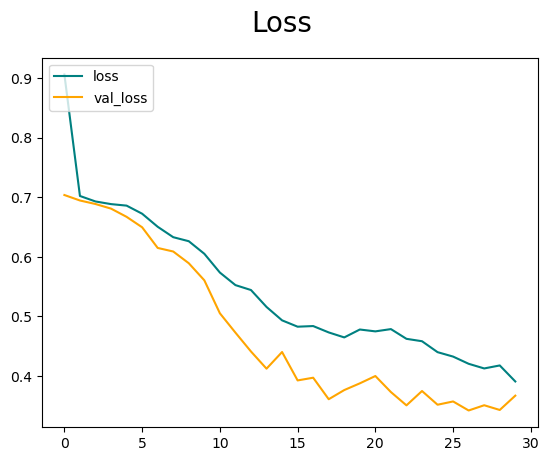

In [12]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

<h3 style="color: #008080;">Model Accuracy</h3>

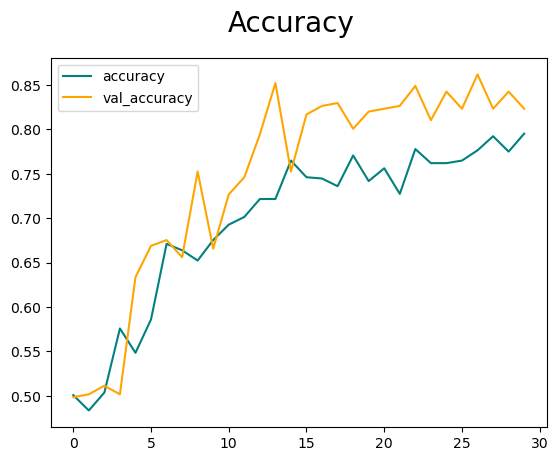

In [13]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

<h3 style="color: #008080;">Loading the best epoch</h3>

In [16]:
checkpoint_path = os.path.join(gynecological, "00_epochs", "save_at_27.keras")
model.load_weights(checkpoint_path)

<h3 style="color: #00BFFF;">Confussion Matrix</h3>

3/3 [==============================] - 47s 11s/step


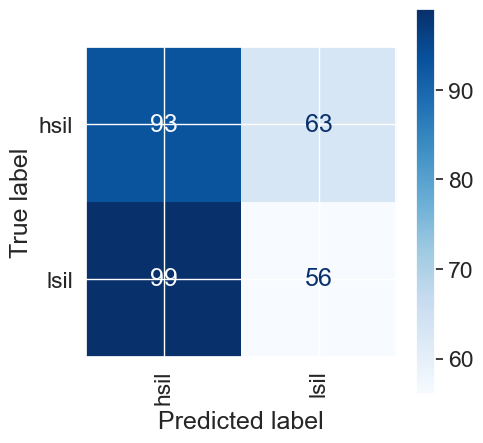

              precision    recall  f1-score   support
hsil           0.484375  0.596154  0.534483  156.0000
lsil           0.470588  0.361290  0.408759  155.0000
accuracy       0.479100  0.479100  0.479100    0.4791
macro avg      0.477482  0.478722  0.471621  311.0000
weighted avg   0.477504  0.479100  0.471823  311.0000


In [17]:
# true labels
true_labels = val_ds.classes

# predictions
predictions = model.predict(val_ds)
pred_labels = (predictions > 0.5).astype("int32")  # classify as 0 or 1 based on threshold

# compute the confusion matrix
cm = confusion_matrix(true_labels, pred_labels)

# class names
class_names = list(val_ds.class_indices.keys())

# plot the confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))  # Increase the size of the figure
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(ax=ax, cmap='Blues', xticks_rotation='vertical')
plt.show()

sns.set(font_scale=1.5)
report = classification_report(true_labels, pred_labels, target_names=class_names, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# report as a dataframe
print(df_report)

<h3 style="color: #00BFFF;">Testing the Model Vs Unseen Data</h3>

In [18]:
# testing an H-SIL image
rel_img_path = 'hsil/IB00405.bif [0] (2).png' # relative path
img_path = os.path.join(test_dir, rel_img_path) # complete path

# load and preprocess the image
img = image.load_img(img_path, target_size=(256, 256))
img_array = np.expand_dims(image.img_to_array(img), axis=0)

# predictions
predictions = model.predict(img_array)
class_idx = np.argmax(predictions[0])  # class with highest probability
class_prob = predictions[0][class_idx]

# class label and confidence
class_label = {v: k for k, v in train_ds.class_indices.items()}[class_idx]
print(f"The model predicts this image as: {class_label} with {class_prob*100:.2f}% confidence")

1/1 [==============================] - 0s 168ms/step
The model predicts this image as: hsil with 0.00% confidence


In [19]:
# testing an L-SIL image
rel_img_path2 = 'lsil/IB00462.bif [0] (6).png' # relative path
img_path2 = os.path.join(test_dir, rel_img_path2) # complete path

# load and preprocess the image
img2 = image.load_img(img_path2, target_size=(256, 256))
img_array2 = np.expand_dims(image.img_to_array(img2), axis=0)

# predictions
predictions2 = model.predict(img_array2)
class_idx2 = np.argmax(predictions2[0])  #ç class with highest probability
class_prob2 = predictions2[0][class_idx2]

# class label and confidence
class_label2 = {v: k for k, v in train_ds.class_indices.items()}[class_idx2]
print(f"The model predicts this image as: {class_label2} with {class_prob2*100:.2f}% confidence")

1/1 [==============================] - 0s 93ms/step
The model predicts this image as: hsil with 0.00% confidence
